Emotion analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
import seaborn as sns
import numpy as np

In [2]:
import os
os.getcwd()

'c:\\Users\\harleyquinn\\Desktop\\docu3c\\bollywood_movie_analysis\\final'

In [3]:
os.chdir("C:\\Users\\harleyquinn\\Desktop\\docu3c\\bollywood_movie_analysis\\trailer-data")

In [4]:

cols = ['frame_number', 'gender', 'emotion', 'year', 'df_name']
movie = pd.read_csv('complete_data.csv', on_bad_lines='skip')

In [5]:
movie

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya
...,...,...,...,...,...
32192,18,man,happy,2016,housefull_3
32193,25,man,neutral,2016,housefull_3
32194,25,man,neutral,2016,housefull_3
32195,25,man,happy,2016,housefull_3


In [6]:
woman = movie.loc[movie['gender'] == 'woman']
man = movie.loc[movie['gender'] == 'man']
woman = woman.loc[movie['emotion'] != 'neutral']
man = man.loc[movie['emotion'] != 'neutral']

womansemotions = woman.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()
mansemotions = man.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()

In [7]:
res_woman = woman.groupby(by=['emotion'])['frame_number'].count()
res_woman=res_woman.to_frame(name = 'count').reset_index()
labels=res_woman['emotion'].tolist()
#res_woman

res_man = man.groupby(by=['emotion'])['frame_number'].count()
res_man=res_man.to_frame(name = 'count').reset_index()
labels=res_man['emotion'].tolist()


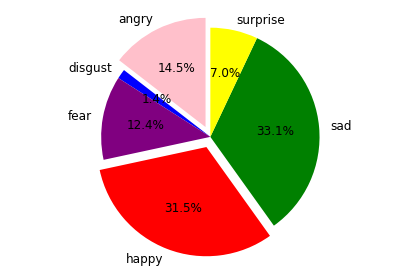

In [8]:
plt.rcParams.update({'font.size': 12})

colors = ['pink', 'blue', 'purple', 'red', 'green', 'yellow', 'cyan']

plt.pie(res_woman['count'],labels=res_woman['emotion'], shadow=False, colors=colors, explode=(0.10, 0, 0, 0.10, 0, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()


In [9]:
year_woman = woman.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_woman['emotion']:
    ym = year_woman[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    womansemotions = pd.merge(womansemotions,ym, on ='year')
    womansemotions[emotion] = womansemotions[emotion+'emotioncount']*1.0/womansemotions['count']*100
womansemotions.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,309,36,11.650485,3,0.970874,25,8.090615,101,32.686084,120,38.834951,24,7.766990
1,2009,280,40,14.285714,3,1.071429,25,8.928571,81,28.928571,110,39.285714,21,7.500000
2,2010,562,87,15.480427,4,0.711744,69,12.277580,176,31.316726,198,35.231317,28,4.982206
3,2011,755,86,11.390728,15,1.986755,91,12.052980,242,32.052980,268,35.496689,53,7.019868
4,2012,521,66,12.667946,13,2.495202,68,13.051823,173,33.205374,158,30.326296,43,8.253359


In [10]:
woman = womansemotions.drop('count', axis=1)
del woman['angryemotioncount']
del woman['disgustemotioncount']
del woman['fearemotioncount']
del woman['happyemotioncount']
del woman['sademotioncount']
del woman['surpriseemotioncount']
woman.head()

,year,angry,disgust,fear,happy,sad,surprise
0,2008,11.650485,0.970874,8.090615,32.686084,38.834951,7.766990
1,2009,14.285714,1.071429,8.928571,28.928571,39.285714,7.500000
2,2010,15.480427,0.711744,12.277580,31.316726,35.231317,4.982206
3,2011,11.390728,1.986755,12.052980,32.052980,35.496689,7.019868
4,2012,12.667946,2.495202,13.051823,33.205374,30.326296,8.253359


In [11]:
year_man = man.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_man['emotion']:
    ym = year_man[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    mansemotions = pd.merge(mansemotions,ym, on ='year')
    mansemotions[emotion] = mansemotions[emotion+'emotioncount']*1.0/mansemotions['count']*100
mansemotions.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,639,153,23.943662,4,0.625978,52,8.137715,175,27.386541,230,35.993740,25,3.912363
1,2009,677,192,28.360414,5,0.738552,59,8.714919,164,24.224520,231,34.121123,26,3.840473
2,2010,1210,305,25.206612,21,1.735537,139,11.487603,306,25.289256,395,32.644628,44,3.636364
3,2011,1480,331,22.364865,18,1.216216,155,10.472973,381,25.743243,544,36.756757,51,3.445946
4,2012,1232,334,27.110390,13,1.055195,102,8.279221,366,29.707792,359,29.139610,58,4.707792


In [12]:
man = mansemotions.drop('count', axis=1)
del man['angryemotioncount']
del man['disgustemotioncount']
del man['fearemotioncount']
del man['happyemotioncount']
del man['sademotioncount']
del man['surpriseemotioncount']
man.head()

,year,angry,disgust,fear,happy,sad,surprise
0,2008,23.943662,0.625978,8.137715,27.386541,35.993740,3.912363
1,2009,28.360414,0.738552,8.714919,24.224520,34.121123,3.840473
2,2010,25.206612,1.735537,11.487603,25.289256,32.644628,3.636364
3,2011,22.364865,1.216216,10.472973,25.743243,36.756757,3.445946
4,2012,27.110390,1.055195,8.279221,29.707792,29.139610,4.707792


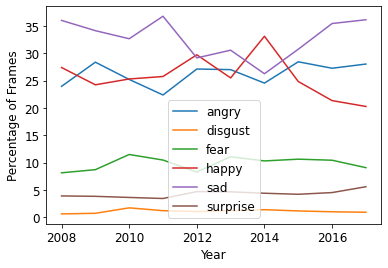

In [13]:
y_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']
ax = man.plot.line(x = 'year', y = y_labels)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")

fig = ax.get_figure()


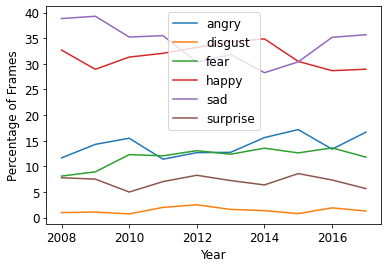

In [14]:
ax = woman.plot.line(x = 'year', y = y_labels)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")
fig = ax.get_figure()

In [15]:
woman_new = woman
woman_new.columns = ['year', 'woman_angry', 'woman_disgust', 'woman_fear', 'woman_happy', 'woman_sad', 'woman_surprise']


del woman_new['woman_disgust']
del woman_new['woman_fear']
del woman_new['woman_surprise']

In [16]:
man_new = man
man_new.columns = ['year', 'man_angry', 'man_disgust', 'man_fear', 'man_happy', 'man_sad', 'man_surprise']

del man_new['man_disgust']
del man_new['man_fear']
del man_new['man_surprise']

In [17]:
common = pd.merge(man_new, woman_new, on= 'year')
common.head()

,year,man_angry,man_happy,man_sad,woman_angry,woman_happy,woman_sad
0,2008,23.943662,27.386541,35.993740,11.650485,32.686084,38.834951
1,2009,28.360414,24.224520,34.121123,14.285714,28.928571,39.285714
2,2010,25.206612,25.289256,32.644628,15.480427,31.316726,35.231317
3,2011,22.364865,25.743243,36.756757,11.390728,32.052980,35.496689
4,2012,27.110390,29.707792,29.139610,12.667946,33.205374,30.326296


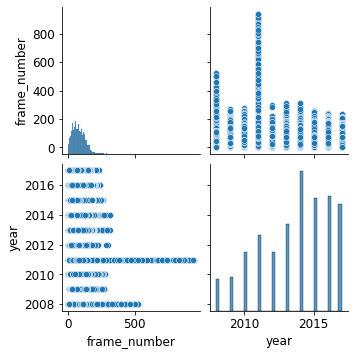

In [18]:
sns.pairplot(movie);

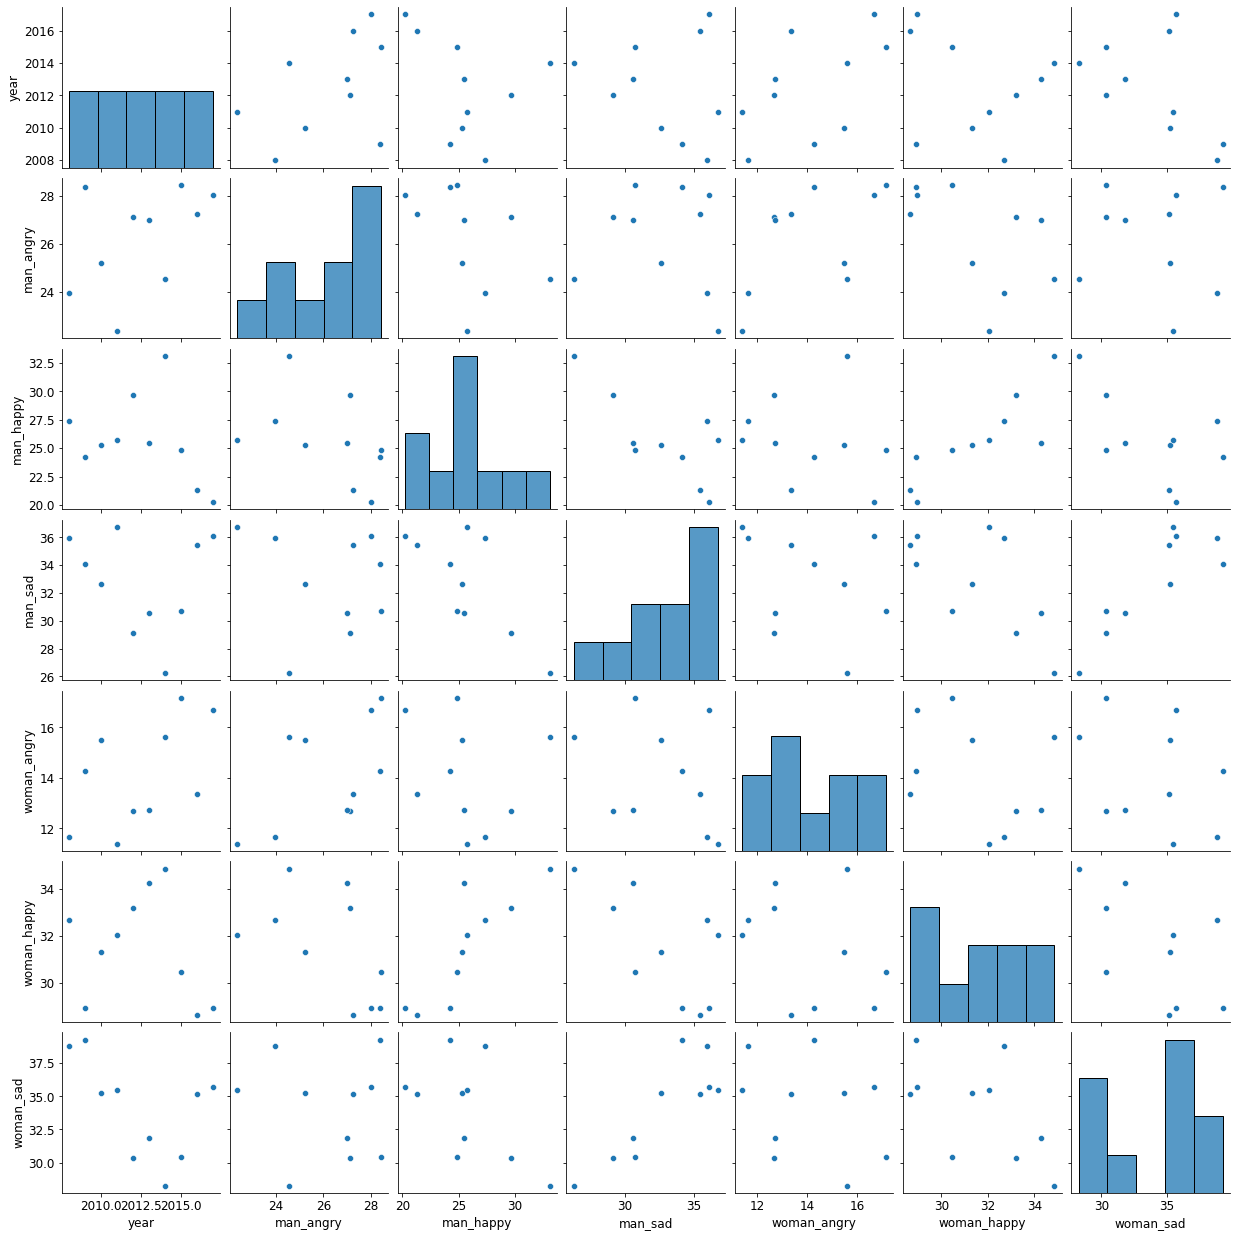

In [19]:
sns.pairplot(common);